In [1]:
server_addr = "ofi+verbs://10.3.1.3:35126"

In [2]:
symbiomon_provider_id = 42


In [3]:
from pymargo.core import Engine
import pymargo

In [4]:
from pysymbiomon.client import *


In [5]:
mid = Engine('verbs', mode=pymargo.client)

In [6]:
client = SymbiomonClient(mid)

In [7]:
addr = mid.lookup(server_addr)

In [8]:
id_ = client.metric_get_id("tau2", "MPI_Allreduce()_Exclusive_TIME_GLOBAL_MAX", [])
min_ = client.metric_get_id("tau2", "MPI_Allreduce()_Exclusive_min_TIME_GLOBAL_MIN", [])

In [9]:
print (id_)
print (min_)

813424679
728029702


In [10]:
mh = client.create_metric_handle(addr, id_, symbiomon_provider_id)
mh_min = client.create_metric_handle(addr, min_, symbiomon_provider_id)

In [11]:
max_samples = 10
samples = mh.metric_fetch(max_samples) #Fetches latest <max_samples> samples
samples_min = mh_min.metric_fetch(max_samples) #Fetches latest <max_samples> samples
print("Requested for:", max_samples, "samples, got: ", len(samples))
print("Requested for:", max_samples, "samples, got: ", len(samples_min))

('Requested for:', 10, 'samples, got: ', 10)
('Requested for:', 10, 'samples, got: ', 10)


In [12]:
import matplotlib.pyplot as plt

In [18]:
#x = [i[0]/1000000.0 for i in samples]
#x_min = [i[0]/1000000.0 for i in samples_min ]
max_balance = [5.8, 6, 7, 7.6, 8, 8.3, 8.6, 9.8]
max_imbalance = [15, 16, 17, 18, 18.5, 19, 20, 20.5]
min_balance = [1.3, 1.7, 1.9, 2.5, 2.9, 3.2, 3.5, 3.8]
min_imbalance = [0.2, 0.6, 1.0, 1.2, 1.4, 1.6, 1.8, 2.3]

In [19]:
#y = [(i[1] - samples[0][1]) for i in samples ]
y = [0, 2, 4, 6, 8, 10, 12, 14]

In [20]:
fig, ax = plt.subplots(figsize =(10,5))
ax.plot(y, max_balance, label='Balanced Setup: Global MAX')
ax.plot(y, max_imbalance, label='Imbalanced Setup: Global MAX')
ax.plot(y, min_balance, label='Balanced Setup: Global MIN')
ax.plot(y, min_imbalance, label='Imbalanced Setup: Global MIN')
ax.legend(loc=6)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.xlabel('Time Since First Sample (seconds)', fontsize=18)
plt.ylabel('MPI_Allreduce  Time (seconds)', fontsize=18)

NameError: name 'x' is not defined

Text(0, 0.5, 'MPI_Allreduce()_Inclusive_TIME_GLOBAL_MAX')

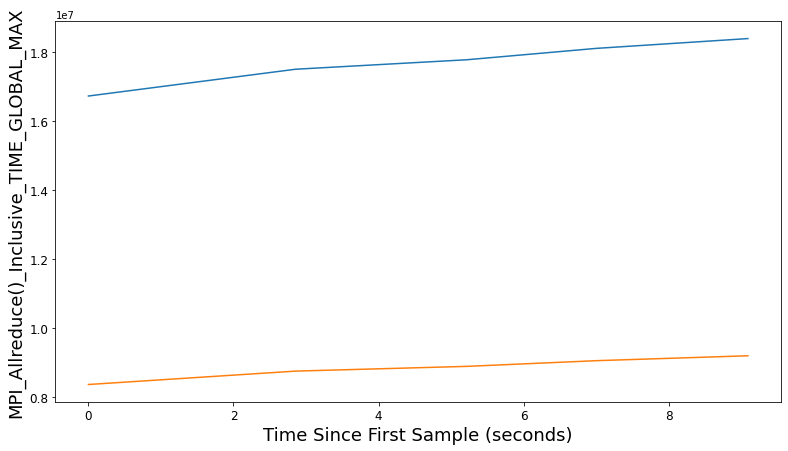

In [37]:
fig, ax = plt.subplots(figsize =(13,7))
z = [0.5*i for i in x]
ax.plot(y, x)
ax.plot(y, z)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.xlabel('Time Since First Sample (seconds)', fontsize=18)
plt.ylabel('MPI_Allreduce()_Inclusive_TIME_GLOBAL_MAX', fontsize=18)